In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df_users = pd.read_csv('./data/raw_small/users.csv')
df_items = pd.read_csv('./data/raw_small/items.csv')
df_inter = pd.read_csv('./data/raw_small/interactions.csv',
                       parse_dates=['last_watch_dt'], dayfirst=True)

In [44]:
users_in_df_users = set(df_users['user_id'].values)
users_in_df_inter = set(df_inter['user_id'].values)
users_to_stay = users_in_df_users.intersection(users_in_df_inter)

df_users_mask = df_users['user_id'].apply(lambda user: user in users_to_stay)
df_inter_mask = df_inter['user_id'].apply(lambda user: user in users_to_stay)

df_users = df_users[df_users_mask].reset_index(drop=True)
df_inter = df_inter[df_inter_mask].reset_index(drop=True)


items_in_df_items = set(df_items['item_id'].values)
items_in_df_inter = set(df_inter['item_id'].values)
items_to_stay = items_in_df_items.intersection(items_in_df_inter)

df_items_mask = df_items['item_id'].apply(lambda item: item in items_to_stay)
df_inter_mask = df_inter['item_id'].apply(lambda item: item in items_to_stay)

df_items = df_items[df_items_mask].reset_index(drop=True)
df_inter = df_inter[df_inter_mask].reset_index(drop=True)

In [45]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       11909 non-null  int64  
 1   content_type  11909 non-null  object 
 2   title         11909 non-null  object 
 3   title_orig    9090 non-null   object 
 4   release_year  11861 non-null  float64
 5   genres        11909 non-null  object 
 6   countries     11894 non-null  object 
 7   for_kids      533 non-null    float64
 8   age_rating    11908 non-null  float64
 9   studios       755 non-null    object 
 10  directors     11039 non-null  object 
 11  actors        10156 non-null  object 
 12  description   11908 non-null  object 
 13  keywords      11502 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.3+ MB


In [46]:
df_inter.sample(2)

,user_id,item_id,last_watch_dt,total_dur,watched_pct
1035258,7699,15297,2021-06-07,13778.0,13.0
723687,594272,8014,2021-04-04,32.0,0.0


In [47]:
df_items.sample(2)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
5621,4856,series,Рейс 222,NaN,1985.0,"драмы, советские, мелодрамы",СССР,NaN,12.0,"Ленфильм, рентв",Сергей Микаэлян,"Александр Бабанов, Александр Иванов, Александр...","В 1979 году, в самый разгар холодной войны лид...","Рейс, 222, 1985, СССР, брак, интриги, политика..."
3036,13204,film,Корова,Cow,2018.0,драмы,Испания,NaN,12.0,NaN,Марта Байари,"Марта Байарри, Пепо Бласко","Марга застряла в рутинной жизни, работая на ск...","2018, испания, корова"


In [48]:
df_users.sample(2)

,user_id,age,income,sex,kids_flg
410612,573855,age_18_24,income_20_40,Ж,0
257142,62913,age_25_34,income_20_40,М,1


## Interactions

### Overview

The most popular movies

In [49]:
views = df_inter.groupby('item_id').size().rename('views')
df_items = df_items.merge(views, left_on='item_id', right_index=True).\
    sort_values('views', ignore_index=True, ascending=False)

df_items[:10][['title', 'views', 'release_year', 'actors', 'description']]

,title,views,release_year,actors,description
0,Хрустальный,38876,2021.0,"Антон Васильев, Николай Шрайбер, Екатерина Оль...",Сергей Смирнов — один из лучших «охотников на ...
1,Клиника счастья,37113,2021.0,"Дарья Мороз, Анатолий Белый, Данил Акутин, Мар...","Успешный сексолог Алена уверена, что нашла фор..."
2,Гнев человеческий,32953,2021.0,"Джейсон Стэйтем, Холт МакКэллани, Джеффри Доно...",Грузовики лос-анджелесской инкассаторской комп...
3,Девятаев,28375,2021.0,"Павел Прилучный, Павел Чинарёв, Тимофей Трибун...",Военно-исторический блокбастер от режиссёров Т...
4,Секреты семейной жизни,19562,2021.0,"Петр Скворцов, Алена Михайлова, Федор Лавров, ...",У Никиты и Полины всё начиналось прекрасно: об...
5,Прабабушка легкого поведения,17432,2021.0,"Александр Ревва, Глюкоза, Дмитрий Нагиев, Миха...","1980 год, вся страна следит за событиями моско..."
6,Афера,12604,2021.0,"Сергей Степин, Игорь Царегородцев, Татьяна Лял...","Смотри:- как кино- как сериалКарантин окончен,..."
7,Подслушано,12134,2021.0,"Александр Hовиков, Валентина Ляпина, Никита Па...",Смотри:- как кино- как сериалПодростковый псих...
8,Маша,10042,2020.0,"Максим Суханов, Аня Чиповская, Полина Гухман, ...",13-летняя Маша растёт между боксёрским рингом ...
9,Белый снег,8622,2021.0,"Ольга Лерман, Федор Добронравов, Надежда Марки...",Отечественная спортивная драма про лыжницу и о...


cumplots of views

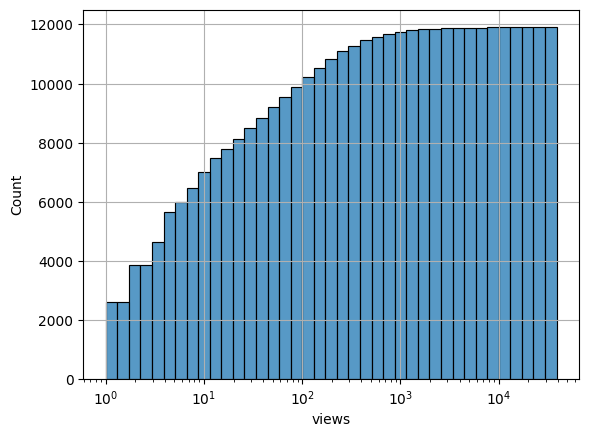

In [50]:
df_views = df_items['views']
sns.histplot(df_views, log_scale=True, cumulative=True)
plt.grid()

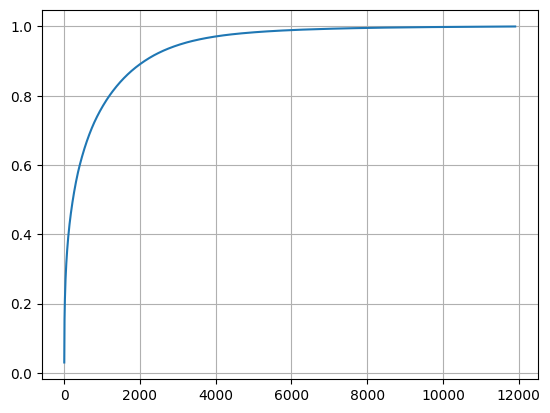

In [51]:
cumsum = df_views.cumsum()
cumsum = cumsum / cumsum.iloc[-1]
cumsum.index = np.arange(1, len(df_views)+1)
cumsum.plot()
plt.grid()

In [52]:
cumsum[1999], df_views[1999]

(0.8910307781942084, 102)

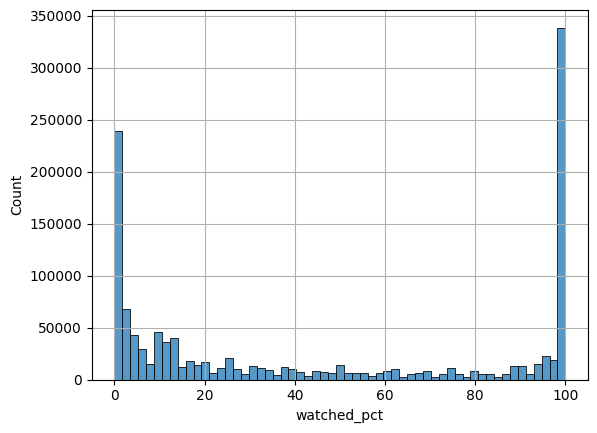

In [53]:
sns.histplot(data=df_inter, x='watched_pct')
plt.grid()

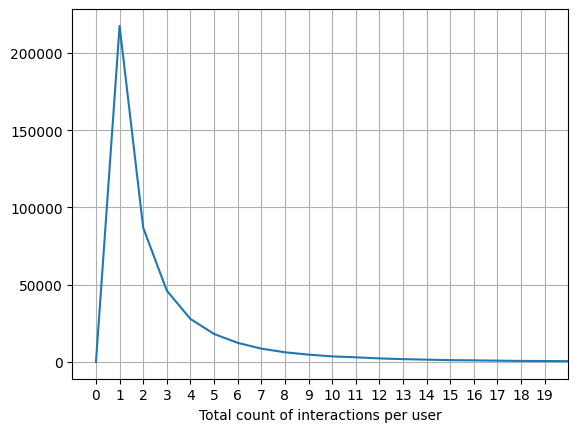

In [54]:
a = df_inter.groupby('user_id').size().value_counts()
a[0] = 0
a.sort_index().plot()
plt.xlabel('Total count of interactions per user')
plt.xlim([-1, 20])
plt.xticks(range(20))
plt.grid()

### Preparation

In [55]:
df_inter.isna().sum()

user_id            0
item_id            0
last_watch_dt      0
total_dur          1
watched_pct      211
dtype: int64

In [56]:
####
df_inter.drop(1288996, inplace=True)

In [57]:
df_inter.drop(['total_dur'], axis=1, inplace=True)
df_inter['watched_pct'] = df_inter['watched_pct'].fillna(50.)

df_inter.sort_values('last_watch_dt', inplace=True)

In [58]:
df_inter.sample(1)

,user_id,item_id,last_watch_dt,watched_pct
1099006,826814,12743,2021-06-23,100.0


Save modified data to new csv-file.

In [59]:
df_inter.to_csv('./data/processed/interactions.csv', index=False)

## Items

### Overview

In [60]:
df_items.describe(include='object')

,content_type,title,title_orig,genres,countries,studios,directors,actors,description,keywords
count,11909,11909,9090,11909,11894,755,11039,10156,11908,11502
unique,2,11461,8631,2273,635,37,6541,9943,11674,11459
top,film,Родина,Pet Sematary,документальное,США,HBO,Оливье Шиабоду,Александр Клюквин,МТС «Карантинники» — это домашние акустические...,"2015, чехия, секс, страсть"
freq,9189,4,4,634,3337,242,388,20,35,6


In [61]:
df_items['content_type'].value_counts()

content_type
film      9189
series    2720
Name: count, dtype: int64

In [62]:
df_items['age_rating'].value_counts().sort_index()

age_rating
0.0     1053
6.0     1038
12.0    2915
16.0    4335
18.0    2108
21.0     459
Name: count, dtype: int64

In [63]:
df_items['genres'].value_counts()

genres
документальное                                                   634
драмы                                                            614
комедии                                                          474
для взрослых                                                     459
мелодрамы, комедии                                               236
                                                                ... 
для детей, приключения, зарубежные, семейное, комедии              1
русские, для детей, русские мультфильмы, приключения, комедии      1
музыка, развлекательные, для детей, музыкальные                    1
приключения, зарубежные, ужасы, артхаус, фэнтези, комедии          1
для взрослых, ужасы, зарубежные, фэнтези                           1
Name: count, Length: 2273, dtype: int64

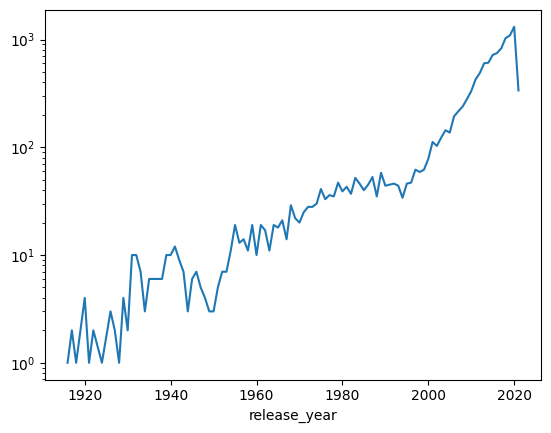

In [64]:
df_items['release_year'].value_counts().sort_index().plot(logy=True);

In [65]:
listoflists = df_items['keywords'].apply(lambda line: str(line).split(', '))
keywords = [word for line in listoflists for word in line]
pd.Series(keywords).value_counts().head(10)

отношения            5575
соединенные штаты    2611
Россия               2050
женщины              1637
любовь               1591
США                  1497
борьба               1374
мужчины              1366
преодоление          1283
трудностей           1281
Name: count, dtype: int64

In [66]:
df_items.sample(1)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords,views
1932,10054,film,Слендер,Always Watching: A Marble Hornets Story,2014.0,ужасы,США,NaN,16.0,NaN,Джеймс Моран,"Александра Холден, Крис Маркетт, Александра Бр...","Съемочная группа, готовящая сюжет про исчезнув...","Слендер-Мэн, галлюцинация, сверхъестественное ...",108


### Preparation

In [67]:
df_items_mod = df_items.drop(
    ['title_orig', 'release_year', 'countries', 'for_kids', 'studios',
     'directors', 'actors', 'description'], axis=1)

In [68]:
df_items_mod.isnull().sum()

item_id           0
content_type      0
title             0
genres            0
age_rating        1
keywords        407
views             0
dtype: int64

In [69]:
df_items_mod['age_rating'] = df_items_mod['age_rating'].fillna(0)
df_items_mod['age_rating'] = df_items_mod['age_rating'].astype(int)
df_items_mod['age_rating'] = df_items_mod['age_rating'].astype('object')

In [70]:
df_items_mod.sample(1)

,item_id,content_type,title,genres,age_rating,keywords,views
10623,12728,film,Воскрешение,"ужасы, триллеры",16,"ведьма, воскрешение, допрос, икона, кладбище, ...",1


In [71]:
df_items_mod.to_csv('./data/processed/items.csv', index=False)

## Users overview

### Overview

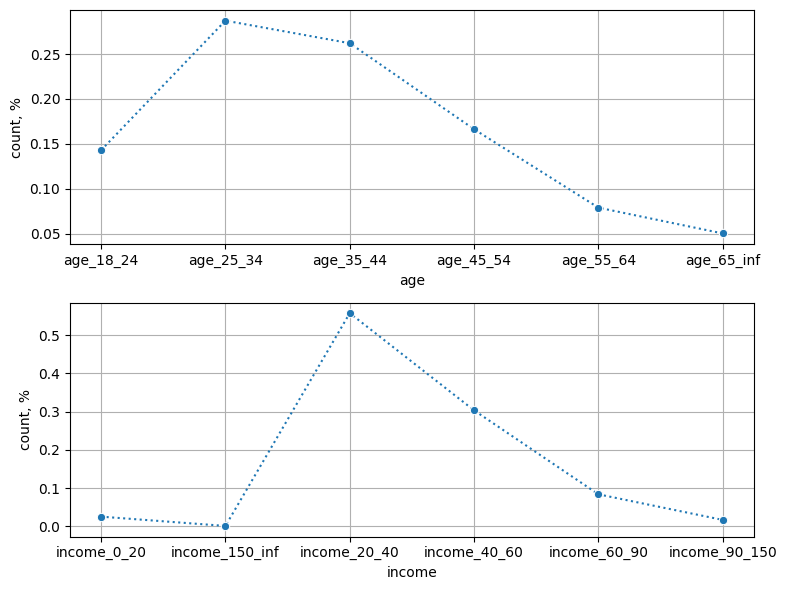

In [72]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.lineplot(df_users['age'].value_counts().sort_index()/len(df_users), linestyle='dotted', marker='o')
plt.ylabel('count, %')
plt.grid()

plt.subplot(2, 1, 2)
sns.lineplot(df_users['income'].value_counts().sort_index()/len(df_users), linestyle='dotted', marker='o')
plt.ylabel('count, %')
plt.grid()

plt.tight_layout()

In [73]:
df_users.describe(include='object')

,age,income,sex
count,443303,443417,443377
unique,6,6,2
top,age_25_34,income_20_40,Ж
freq,128909,250031,225550


In [74]:
df_users['kids_flg'].value_counts()

kids_flg
0    305867
1    142931
Name: count, dtype: int64

### Preparation

In [75]:
df_users['kids_flg'] = df_users['kids_flg'].fillna(0)
df_users['age'] = df_users['age'].fillna('age_25_34')
df_users['income'] = df_users['income'].fillna('income_20_40')
df_users['sex'] = df_users['sex'].fillna('Ж')

In [76]:
df_users.to_csv('./data/processed/users.csv', index=False)